In [1]:
# have to import both, but the second one just gives the extract() to get the sequence at a location.
# if you don't have Bio installed, just have to do "conda install biopython" in terminal
from Bio import SeqIO
from Bio.SeqFeature import FeatureLocation
from Bio import pairwise2
from Bio.pairwise2 import format_alignment 

import logomaker

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp
import numpy as np
import random
from matplotlib import pyplot as plt

import pyhmmer
pyhmmer.__version__

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

from matplotlib.pyplot import figure

from random import randrange
from collections import Counter

In [2]:
# get a record of the file, where the first item from parse() is the largest chromosome
file = 'E. coli Nissle Genome.gbff' 
record = list(SeqIO.parse(file, 'gb'))[0]

In [3]:
# if you need the sequence of the whole record
seq = record.seq

## Importing and creating dataframe for relevant Nissle parameters

In [4]:
# takes a gbff genebank file record and excel spreadsheet 
# containing gene names of interest
def gene_df_generator(record, genes_df):
    # initialiize empty gene name and sequence arrays
    gene_names = []
    gene_seqs = []
    gene_tls = []
    gene_products = []
    
    # loop through all the genes of interest
    for i in range(len(genes_df)):
        
        # loop through every feature (gene) of the genome
        for j in range(len(record.features)):
            feature_OI = record.features[j] # current feature of interest

            try:
                if feature_OI.qualifiers['gene'][0] == genes_df.Gene[i]:
                    gene_OI = feature_OI.qualifiers['gene'][0] # gene name
                    
                    # get position of gene in genome
                    location_OI = feature_OI.location 

                    # getting the sequence at that location using extract()
                    seq_record_OI = location_OI.extract(record)
                    gene_seq_OI = seq_record_OI.seq
                    
                    # AA sequence of gene
                    gene_tl_OI = feature_OI.qualifiers['translation'][0] 
                    # gene function description
                    gene_product_OI = feature_OI.qualifiers['product'] 

                    gene_products.append(gene_product_OI[0])
                    gene_names.append(gene_OI)
                    gene_seqs.append(gene_seq_OI)
                    gene_tls.append(gene_tl_OI)

            except KeyError as KE: 
                # workaround for key error that results for genes that do 
                # not have gene products listed
                KE = KE

    genes_df['Gene'] = gene_names # input gene name into df
    genes_df['Description'] = gene_products # input gene descirption into df
    genes_df['Sequence'] = gene_seqs # input gene nt sequence into df
    genes_df['Translation'] = gene_tls # input gene aa sequence into df
    
    return genes_df


In [5]:
# load excel spreadsheets with genes of interest from E. coli Nissle (EcN)
# cluster spreadsheets and clusters correspond to more specific families of genes
genes_df_all = pd.read_excel('Metal Transporter Genes in E. coli Nissle (440).xlsx')
genes_df_cus = pd.read_excel('cus cluster.xlsx') # copper/silver
genes_df_fec = pd.read_excel('fec cluster.xlsx') # iron
genes_df_zn = pd.read_excel('zn cluster.xlsx') # zinc
genes_df_sit = pd.read_excel('sit cluster.xlsx') # iron/manganese

genes_df_all = gene_df_generator(record, genes_df_all) # all genes listed below
genes_df_cus = gene_df_generator(record, genes_df_cus) # copper/silver transporters
genes_df_fec = gene_df_generator(record, genes_df_fec) # iron transporters
genes_df_zn = gene_df_generator(record, genes_df_zn) # zinc transporters
genes_df_sit = gene_df_generator(record, genes_df_sit) # iron/manganese transporters

# display gene dataframes to check
display(genes_df_all)
display(genes_df_cus)
display(genes_df_fec)
display(genes_df_zn)
display(genes_df_sit)

# export gene information to excel
genes_df_all.to_excel('Genes of Interest Nissle.xlsx')

Gene                                        Description  \
0   cusA  Cu(+)/Ag(+) efflux RND transporter permease su...   
1   cusB  Cu(+)/Ag(+) efflux RND transporter periplasmic...   
2   cusC  Cu(+)/Ag(+) efflux RND transporter outer membr...   
3   cusF  Cu(+)/Ag(+) efflux RND transporter periplasmic...   
4   fecA            Fe(3+) dicitrate transport protein FecA   
5   fecB  Fe(3+) dicitrate ABC transporter substrate-bin...   
6   fecC       iron-dicitrate ABC transporter permease FecC   
7   fecD  Fe(3+) dicitrate ABC transporter permease subu...   
8   fecE  Fe(3+) dicitrate ABC transporter ATP-binding p...   
9   zntB                              zinc transporter ZntB   
10  znuA  zinc ABC transporter substrate-binding protein...   
11  znuB         zinc ABC transporter permease subunit ZnuB   
12  znuC      zinc ABC transporter ATP-binding protein ZnuC   
13  zupT                              zinc transporter ZupT   
14  sitA  iron/manganese ABC transporter substrate-bindi...   
15  sitB  iron/manganese ABC transporter ATP-binding pro...   
16  sitC  iron/manganese ABC transporter permease subuni...   
17  sitD  iron/manganese ABC transporter permease subuni...   

                                             Sequence  \
0   (A, T, G, A, T, T, G, A, A, T, G, G, A, T, T, ...   
1   (A, T, G, A, A, A, A, A, A, A, T, C, G, C, G, ...   
2   (A, T, G, T, C, T, C, C, T, T, G, T, A, A, A, ...   
3   (A, T, G, A, A, A, A, A, A, G, C, A, C, T, G, ...   
4   (A, T, G, A, C, G, C, C, G, T, T, A, C, G, C, ...   
5   (A, T, G, T, T, G, G, C, A, T, T, T, A, T, C, ...   
6   (A, T, G, A, C, C, G, C, G, A, T, A, A, A, A, ...   
7   (A, T, G, A, A, A, A, T, T, G, C, G, C, T, G, ...   
8   (A, T, G, A, C, T, T, T, A, C, G, A, A, C, T, ...   
9   (G, T, G, G, A, A, G, C, G, A, T, T, A, A, G, ...   
10  (A, T, G, T, T, A, C, A, T, A, A, A, A, A, A, ...   
11  (A, T, G, A, T, T, G, A, A, T, T, A, T, T, A, ...   
12  (A, T, G, A, C, A, A, G, T, C, T, G, G, T, T, ...   
13  (A, T, G, T, C, A, G, T, A, C, C, T, C, T, C, ...   
14  (A, T, G, C, A, C, T, C, G, A, T, A, A, A, A, ...   
15  (A, T, G, A, T, G, C, A, A, T, C, T, G, C, A, ...   
16  (A, T, G, A, A, C, G, T, G, C, T, A, C, T, G, ...   
17  (A, T, G, A, T, G, G, C, A, T, T, A, T, T, A, ...   

                                          Translation  
0   MIEWIIRRSVANRFLVLMGALFLSIWGTWTIINTPVDALPDLSDVQ...  
1   MKKIALIIGSMIAGGIISAAGFTWFAKEEPPAEKTSTAERKVLFWY...  
2   MSPCKLLPFCVALALTGCSLAPDYQRPAMPVPQQFSLSQNGLVNAA...  
3   MKKALQVAMFSLFTVIGFNAQANEHHHETMSEAQPQVISATGVVKG...  
4   MTPLRVFRKTTPLVNAIRLSLLPLAGLSFSAFAAQVNIAPGSLDKA...  
5   MLAFIRFIFAGLLLVISHAFAATVQDEHGTFTLEKTPQRIVVLELS...  
6   MTAIKHPVLLWGLPVAALIIIFWLSLFCYSAIPVSGADATRALLPG...  
7   MKIALVIFITLALAGCALLSLHMGVIPVPWRALLTDWQAGREHYYV...  
8   MTLRTENLTVSYGTDKVLNDVSLSLPTGKITALIGPNGCGKSTLLN...  
9   MEAIKGSDVNVPDAVFAWMLDGRGGVKPLENTDVIDEAHPCWLHLN...  
10  MLHKKTLLFAALSAALWGGATQAADAAVVASLKPVGFIASAIADGV...  
11  MIELLFPGWLAGIMLACAAGPLGSFVVWRRMSYFGDTLAHASLLGV...  
12  MTSLVSLENVSVSFGQRRVLSDVSLELKPGKILTLLGPNGAGKSTL...  
13  MSVPLILTILAGAATFIGAFLGVLGQKPSNRLLAFSLGFAAGIMLL...  
14  MHSIKKVTMLLGGLALTCSIAFQASATEKFKVITTFTIIADMAKNV...  
15  MMQSAGIVVNDVTVTWRNGHTALRDASFTVPSGSIAALVGVNGSGK...  
16  MNVLLEPFSYEYMLNAMWVSAMVGGLCAFLSCYLMLKGWSLIGDAL...  
17  MMALLLEPLQFTFMSHALLISLVVSIPCALLSVFLVLKGWALMGDA...

Gene                                        Description  \
0  cusA  Cu(+)/Ag(+) efflux RND transporter permease su...   
1  cusB  Cu(+)/Ag(+) efflux RND transporter periplasmic...   
2  cusC  Cu(+)/Ag(+) efflux RND transporter outer membr...   
3  cusF  Cu(+)/Ag(+) efflux RND transporter periplasmic...   

                                            Sequence  \
0  (A, T, G, A, T, T, G, A, A, T, G, G, A, T, T, ...   
1  (A, T, G, A, A, A, A, A, A, A, T, C, G, C, G, ...   
2  (A, T, G, T, C, T, C, C, T, T, G, T, A, A, A, ...   
3  (A, T, G, A, A, A, A, A, A, G, C, A, C, T, G, ...   

                                         Translation  
0  MIEWIIRRSVANRFLVLMGALFLSIWGTWTIINTPVDALPDLSDVQ...  
1  MKKIALIIGSMIAGGIISAAGFTWFAKEEPPAEKTSTAERKVLFWY...  
2  MSPCKLLPFCVALALTGCSLAPDYQRPAMPVPQQFSLSQNGLVNAA...  
3  MKKALQVAMFSLFTVIGFNAQANEHHHETMSEAQPQVISATGVVKG...

Gene                                        Description  \
0  fecA            Fe(3+) dicitrate transport protein FecA   
1  fecB  Fe(3+) dicitrate ABC transporter substrate-bin...   
2  fecC       iron-dicitrate ABC transporter permease FecC   
3  fecD  Fe(3+) dicitrate ABC transporter permease subu...   
4  fecE  Fe(3+) dicitrate ABC transporter ATP-binding p...   

                                            Sequence  \
0  (A, T, G, A, C, G, C, C, G, T, T, A, C, G, C, ...   
1  (A, T, G, T, T, G, G, C, A, T, T, T, A, T, C, ...   
2  (A, T, G, A, C, C, G, C, G, A, T, A, A, A, A, ...   
3  (A, T, G, A, A, A, A, T, T, G, C, G, C, T, G, ...   
4  (A, T, G, A, C, T, T, T, A, C, G, A, A, C, T, ...   

                                         Translation  
0  MTPLRVFRKTTPLVNAIRLSLLPLAGLSFSAFAAQVNIAPGSLDKA...  
1  MLAFIRFIFAGLLLVISHAFAATVQDEHGTFTLEKTPQRIVVLELS...  
2  MTAIKHPVLLWGLPVAALIIIFWLSLFCYSAIPVSGADATRALLPG...  
3  MKIALVIFITLALAGCALLSLHMGVIPVPWRALLTDWQAGREHYYV...  
4  MTLRTENLTVSYGTDKVLNDVSLSLPTGKITALIGPNGCGKSTLLN...

Gene                                        Description  \
0  zntB                              zinc transporter ZntB   
1  znuA  zinc ABC transporter substrate-binding protein...   
2  znuB         zinc ABC transporter permease subunit ZnuB   
3  znuC      zinc ABC transporter ATP-binding protein ZnuC   
4  zupT                              zinc transporter ZupT   

                                            Sequence  \
0  (G, T, G, G, A, A, G, C, G, A, T, T, A, A, G, ...   
1  (A, T, G, T, T, A, C, A, T, A, A, A, A, A, A, ...   
2  (A, T, G, A, T, T, G, A, A, T, T, A, T, T, A, ...   
3  (A, T, G, A, C, A, A, G, T, C, T, G, G, T, T, ...   
4  (A, T, G, T, C, A, G, T, A, C, C, T, C, T, C, ...   

                                         Translation  
0  MEAIKGSDVNVPDAVFAWMLDGRGGVKPLENTDVIDEAHPCWLHLN...  
1  MLHKKTLLFAALSAALWGGATQAADAAVVASLKPVGFIASAIADGV...  
2  MIELLFPGWLAGIMLACAAGPLGSFVVWRRMSYFGDTLAHASLLGV...  
3  MTSLVSLENVSVSFGQRRVLSDVSLELKPGKILTLLGPNGAGKSTL...  
4  MSVPLILTILAGAATFIGAFLGVLGQKPSNRLLAFSLGFAAGIMLL...

Gene                                        Description  \
0  sitA  iron/manganese ABC transporter substrate-bindi...   
1  sitB  iron/manganese ABC transporter ATP-binding pro...   
2  sitC  iron/manganese ABC transporter permease subuni...   
3  sitD  iron/manganese ABC transporter permease subuni...   

                                            Sequence  \
0  (A, T, G, C, A, C, T, C, G, A, T, A, A, A, A, ...   
1  (A, T, G, A, T, G, C, A, A, T, C, T, G, C, A, ...   
2  (A, T, G, A, A, C, G, T, G, C, T, A, C, T, G, ...   
3  (A, T, G, A, T, G, G, C, A, T, T, A, T, T, A, ...   

                                         Translation  
0  MHSIKKVTMLLGGLALTCSIAFQASATEKFKVITTFTIIADMAKNV...  
1  MMQSAGIVVNDVTVTWRNGHTALRDASFTVPSGSIAALVGVNGSGK...  
2  MNVLLEPFSYEYMLNAMWVSAMVGGLCAFLSCYLMLKGWSLIGDAL...  
3  MMALLLEPLQFTFMSHALLISLVVSIPCALLSVFLVLKGWALMGDA...

## stop... HMMER time

In [6]:
# creates and returns a hidden markov model for gene sequences of interest
def stop_HMMER_time(gene_sequences_OI): # you can't touch this
    # HMMER
    alphabet = pyhmmer.easel.Alphabet.amino()
    
    gene_sequences = []
    
    # loop through all genes of interest and convert to utf_8 format
    for i in range(len(gene_sequences_OI)):
        name = "seq%s" %i
        seq = pyhmmer.easel.TextSequence(name=name.encode('utf_8'), 
                                         sequence=gene_sequences_OI[i])
        gene_sequences.append(seq)
        
    # generate multiple sequence allignment needed to build hmm    
    msa  = pyhmmer.easel.TextMSA(name="msa".encode('utf_8'), 
                                 sequences=gene_sequences)

    msa_d = msa.digitize(alphabet)

    builder = pyhmmer.plan7.Builder(alphabet)
    background = pyhmmer.plan7.Background(alphabet)
    hmm, _, _ = builder.build_msa(msa_d, background)
    
    return hmm

In [7]:
# generates all consensus sequences and alignment scores 
# for every combination of genes of interest
def alignment_df_generator(gene_pairs, genes_df, nt_or_aa):
    # initialize empty alignment score arrays
    alignment_scores = []
    alignment_scores_end = []
    alignment_scores_similarity = []
    consensus_seq = []

    for i in range(len(gene_pairs)):
        
        if nt_or_aa == 'nt': # use genetic nucleotide sequence
            alignments = pairwise2.align.globalxx(genes_df.Sequence[gene_pairs[i][0]], 
                                                  genes_df.Sequence[gene_pairs[i][1]])
        elif nt_or_aa == "aa": # use translation amino acid sequence
            alignments = pairwise2.align.globalxx(genes_df.Translation[gene_pairs[i][0]], 
                                                  genes_df.Translation[gene_pairs[i][1]])
        else:
            return print('Must specify nt or aa sequence.')

        # stop, HMMER time! can't touch this
        sequence1 = alignments[0][1]
        sequence2 = alignments[0][0]
        hmm = stop_HMMER_time([sequence1, sequence2])
        hmm_consensus = hmm.consensus

        alignment_scores.append(alignments[0][2])
        alignment_scores_end.append(alignments[0][4])
        alignment_scores_similarity.append(alignments[0][2]/alignments[0][4])
        consensus_seq.append(hmm_consensus)

    # creating a dictionary and dataframe containing all gene pairs and relevant alignment scores
    gene_pair_names = []
    for i in range(len(gene_pairs)):
        pair_name_OI = genes_df.Gene[gene_pairs[i][0]] + ' + ' + genes_df.Gene[gene_pairs[i][1]]
        gene_pair_names.append(pair_name_OI)

    gene_pair_dict = {'Genes': gene_pair_names, 'Alignment Score': alignment_scores, 
                      'End': alignment_scores_end, 'Similarity': alignment_scores_similarity, 
                      'Consensus': consensus_seq}

    gene_pair_df = pd.DataFrame(data=gene_pair_dict)
    # gene_pair_df
    
    return gene_pair_df

## Compute alignment scores between pairs of genes

In [8]:
def gene_pair_df_generator(genes_df, nt_or_aa):
    # numbers corresponding to each gene of interest
    gene_nums = (np.linspace(0, len(genes_df)-1, len(genes_df))).astype(int)
    
    # all possible pairs in List using list comprehension + enumerate()
    gene_pairs = [(a, b) for idx, a in enumerate(gene_nums) for b in gene_nums[idx + 1:]]
    gene_pair_df = alignment_df_generator(gene_pairs, genes_df, nt_or_aa)
    gene_pair_ranked_df = gene_pair_df.sort_values(by=['Similarity'], ascending=False)
    
    return gene_pair_ranked_df

In [9]:
# nt_or_aa = "nt"
nt_or_aa = "aa"

genes_df_all_paired = gene_pair_df_generator(genes_df_all, nt_or_aa) # all genese listed below
genes_df_cus_paired = gene_pair_df_generator(genes_df_cus, nt_or_aa) # copper/silver transporters
genes_df_fec_paired = gene_pair_df_generator(genes_df_fec, nt_or_aa) # iron transporters
genes_df_zn_paired = gene_pair_df_generator(genes_df_zn, nt_or_aa) # zinc transporters
genes_df_sit_paired = gene_pair_df_generator(genes_df_sit, nt_or_aa) # iron/manganese transporters

In [10]:
display(genes_df_all_paired)
display(genes_df_cus_paired)
display(genes_df_fec_paired)
display(genes_df_zn_paired)
display(genes_df_sit_paired)

Genes  Alignment Score   End  Similarity  \
87   fecC + fecD            159.0   491    0.323829   
152  sitC + sitD            138.0   432    0.319444   
137  znuB + sitD            131.0   415    0.315663   
111  fecE + znuC            116.0   390    0.297436   
136  znuB + sitC            120.0   426    0.281690   
..           ...              ...   ...         ...   
7    cusA + fecE            179.0  1123    0.159394   
11   cusA + znuC            176.0  1122    0.156863   
33   cusC + cusF             75.0   495    0.151515   
48   cusF + fecA             85.0   799    0.106383   
2    cusA + cusF             92.0  1065    0.086385   

                                             Consensus  
87   mtaikhpvialvifitlwgalpvagcaliiifwlslfcysahmgvi...  
152  mnvmalllepfsyeymlnaqftfmwvshamvggllislvvsipcaf...  
137  miemallflepgwlqftfmshagllimslavvsipcaagplglsfv...  
111  mtslrtvslenltvsyvsfGtdkqrrvlnsdvslselkptGkilta...  
136  mienvllfepgwfsyeymlnagimlwvsamvgglcaagpflgsfvv...  
..                                                 ...  
7    miewiirrsvanrflvlmgalflsiwgtwtiintpvdalpdlsdvq...  
11   miewiirrtsvanrflvlmgalflsiwgtwtiintpvdalpdlsdv...  
33   mspckllpfcvalkaltgcslapdyqrpvampvpqqfslsqnglvn...  
48   mktplrvfrkttplvnairlsllplaglsfsafaaqvniamfpgsl...  
2    miewiirrsvanrflvlmgalflsiwgtwtiintpvdalpdlsdvq...  

[153 rows x 5 columns]

Genes  Alignment Score   End  Similarity  \
3  cusB + cusC            160.0   707    0.226308   
0  cusA + cusB            242.0  1212    0.199670   
1  cusA + cusC            250.0  1257    0.198886   
4  cusB + cusF             74.0   443    0.167043   
5  cusC + cusF             75.0   495    0.151515   
2  cusA + cusF             92.0  1065    0.086385   

                                           Consensus  
3  mkspckillpfcvaliigsmiagltGiicsaagftwflakeePdyq...  
0  mkkiewaliirrgsvanrflvlmgialflsggiwisaaGftwfake...  
1  miewiirrsvanrflvlmgapcklflsiwgtwtiintPfcvdalpd...  
4  mkkialiigsmiaggiisaqvagftwmfakeeppaektstaerkvl...  
5  mspckllpfcvalkaltgcslapdyqrpvampvpqqfslsqnglvn...  
2  miewiirrsvanrflvlmgalflsiwgtwtiintpvdalpdlsdvq...

Genes  Alignment Score  End  Similarity  \
7  fecC + fecD            159.0  491    0.323829   
5  fecB + fecD            125.0  493    0.253550   
8  fecC + fecE            117.0  470    0.248936   
9  fecD + fecE            109.0  464    0.234914   
4  fecB + fecC            120.0  512    0.234375   
6  fecB + fecE            101.0  454    0.222467   
1  fecA + fecC            186.0  920    0.202174   
0  fecA + fecB            176.0  898    0.195991   
2  fecA + fecD            176.0  916    0.192140   
3  fecA + fecE            158.0  871    0.181401   

                                           Consensus  
7  mtaikhpvialvifitlwgalpvagcaliiifwlslfcysahmgvi...  
5  mlkiaflvirfiftlalaGcallslhmgvishafapvpwralltvq...  
8  mtaikhpvlrtenlwtvsyGlptdkvaaliiifwlndvslfcysai...  
9  mkialvifitlalagcalrtenltvslhmyGviptdkvpwralltn...  
4  mltafirfifagkhpvllwglpvishafaatvqdehgtftlektpq...  
6  mtlafirfifaglltenltvishafaaygtdkvqlndehgvslslp...  
1  mtplrvfraiktthPlvnairlslwglPlvagalsiiifwlsalfa...  
0  mtplrvfrkttplvnafirlsllplaglsfsaifaaqglllvniap...  
2  mtplrvfrkttplvnairlsllplaglsfsafaaqvniapgsfitl...  
3  mtplrvfrkttplvenairlsllplaglsfsafaaqtvniapgsld...

Genes  Alignment Score  End  Similarity  \
8  znuB + zupT            108.0  410    0.263415   
4  znuA + znuB            111.0  460    0.241304   
2  zntB + znuC            111.0  467    0.237687   
3  zntB + zupT            112.0  472    0.237288   
6  znuA + zupT            108.0  459    0.235294   
5  znuA + znuC            104.0  457    0.227571   
1  zntB + znuB            108.0  480    0.225000   
7  znuB + znuC             94.0  418    0.224880   
9  znuC + zupT             93.0  415    0.224096   
0  zntB + znuA            114.0  523    0.217973   

                                           Consensus  
8  miesvplilfpgwtilaGimlacatfigaflGpvlGqkpsfvvwrn...  
4  mlhkktiellfapgwlagimlsacaagplwGsfvvwrrmsyfGatq...  
2  meaikgtsdlvslenvpdasvsfawmldGqrggrvkplentsdvid...  
3  meaikgsdvnvPdliltilavgaatfigawmfldgrgGvlgqkPle...  
6  msvplhkktiltilfagalsatfigaflwGvlGatqkpsnrllafs...  
5  mlhkktllfaaslvsaalwgenvsvsfGatqaadaarrvlsdvasl...  
1  miellfpgwlagikmlacaaGplgsdvnfvpdavfawmldgrgrms...  
7  miellfpgwlagimlacaagptslgvsflenvsvwrrmsyfGdtqr...  
9  mtslvsplenvsvsiltilagaatfiGqrrvaflsdgvslelkpGq...  
0  meailhkgktllfaalsdvnvpdavfawmldgrwGGvkplenatqa...

Genes  Alignment Score  End  Similarity  \
5  sitC + sitD            138.0  432    0.319444   
4  sitB + sitD            109.0  451    0.241685   
3  sitB + sitC            107.0  453    0.236203   
0  sitA + sitB            108.0  471    0.229299   
1  sitA + sitC            108.0  481    0.224532   
2  sitA + sitD            107.0  482    0.221992   

                                           Consensus  
5  mnvmalllepfsyeymlnaqftfmwvshamvggllislvvsipcaf...  
4  mmallleplqftfmshagllislvvndsipcallsvtflvtwrnlk...  
3  mmqsagivnvllepfsyeymlndamwvtsamvtwrnGhtaglrdca...  
0  mhmqsagikkvvndvtmllgvtwrnGlalhtcsiafqlrdasatek...  
1  mhsikknvtmllggepfsyeymlnamwvsamvggltcsiafqalsa...  
2  mhsikkvtmallgglaepltcsiafqasatekfkvittftmshall...

## Applying HMM Model
Align all EcN genes of interest, then build an HMM from the multiple sequence alignment, after which we can apply the HMM to a sequence database

In [11]:
# pads gene sequences in order to ensure all genese of interest are 
# the same length
def pad_sequences(genes_df):
# extract all gene amino acid sequences
    sequences = []
    for i in range(len(genes_df.Translation)):
        sequences.append(genes_df.Translation[i])

    # added "-" to make all genes equal lengths
    longest_length = max(len(s) for s in sequences)
    padded_sequences = [s.ljust(longest_length, '-') for s in sequences]
    records = (SeqRecord(Seq(s)) for s in padded_sequences)

    genes_df['Padded'] = padded_sequences
    
    return genes_df

genes_df_all = pad_sequences(genes_df_all) # all genes
genes_df_cus = pad_sequences(genes_df_cus) # copper/silver transporters
genes_df_fec = pad_sequences(genes_df_fec) # iron transporters
genes_df_zn = pad_sequences(genes_df_zn) # zinc transporters
genes_df_sit = pad_sequences(genes_df_sit) # iron/manganese transporters

In [12]:
# creating HMM
def create_HMM(genes_df):
    x = []
    for i in range(len(genes_df.Gene)):
        x.append(SeqRecord(Seq(genes_df.Padded.iloc[i]), id=("%s" %genes_df.Gene.iloc[i])))
    align = MultipleSeqAlignment(x)

    align_seq = []
    for i in range(len(align)):
        align_seq.append(str(align[i].seq))

    hmm = stop_HMMER_time(align_seq)
    
    return hmm


# applying HMM
# faa is protein FASTA file
def apply_HMM(hmm, faa):
    alphabet = pyhmmer.easel.Alphabet.amino()
    background = pyhmmer.plan7.Background(alphabet)

    with pyhmmer.easel.SequenceFile(faa, digital=True, alphabet=alphabet) as seq_file:
        sequences = list(seq_file)

    pipeline = pyhmmer.plan7.Pipeline(alphabet, background=background)
    hits = pipeline.search_hmm(query=hmm, sequences=sequences)
    
    if len(hits) == 0:
        return 0
    
    else:
        ali = hits[0].domains[0].alignment

#         print(" "*3, ali.target_name.decode())
#         print("{:3}".format(ali.hmm_from), ali.hmm_sequence[:80] + "...")
#         print(" "*3, ali.identity_sequence[:80] + "...")
#         print("{:3}".format(ali.target_from), ali.target_sequence[:80] + "...")
#         print(" "*3, ali.hmm_name.decode(), "\n")

        target_protein_seq = ali.target_sequence
        target_protein_name = ali.target_name.decode()

#         print("Target protein name:", target_protein_name, "\n")
#         print("Target protein sequence:", target_protein_seq, "\n")

        return [target_protein_name, target_protein_seq]

In [13]:
# Salmonella
faa_salm = "Salmonella.faa"
# print("\n", faa_salm, "\n")

hmm_all_salm = create_HMM(genes_df_all)
protein_all_salm = apply_HMM(hmm_all_salm, faa_salm)

hmm_cus_salm = create_HMM(genes_df_cus)
protein_cus_salm = apply_HMM(hmm_cus_salm, faa_salm)

hmm_fec_salm = create_HMM(genes_df_fec)
protein_fec_salm = apply_HMM(hmm_fec_salm, faa_salm)

hmm_zn_salm = create_HMM(genes_df_zn)
protein_zn_salm = apply_HMM(hmm_zn_salm, faa_salm)

hmm_sit_salm = create_HMM(genes_df_sit)
protein_sit_salm = apply_HMM(hmm_sit_salm, faa_salm)

salm_proteins_name = [protein_all_salm[0], protein_cus_salm[0],
                      protein_fec_salm[0], protein_zn_salm[0], protein_sit_salm[0]]

salm_proteins_seq = [protein_all_salm[1], protein_cus_salm[1],
                     protein_fec_salm[1], protein_zn_salm[1], protein_sit_salm[1]]

protein_dict_salm = {'Protein Name': salm_proteins_name, 
                     'Protein Sequence': salm_proteins_seq}

protein_df_salm = pd.DataFrame(data=protein_dict_salm)


# Bacillus subtilis
faa_bac_subt = "Bacillus subtilis.faa"
# print("\n", faa_bac_subt, "\n")

hmm_all_bac_subt = create_HMM(genes_df_all)
protein_all_bac_subt = apply_HMM(hmm_all_bac_subt, faa_bac_subt)

hmm_cus_bac_subt = create_HMM(genes_df_cus)
protein_cus_bac_subt = apply_HMM(hmm_cus_bac_subt, faa_bac_subt)

hmm_fec_bac_subt = create_HMM(genes_df_fec)
protein_fec_bac_subt = apply_HMM(hmm_fec_bac_subt, faa_bac_subt)

hmm_zn_bac_subt = create_HMM(genes_df_zn)
protein_zn_bac_subt = apply_HMM(hmm_zn_bac_subt, faa_bac_subt)

hmm_sit_bac_subt = create_HMM(genes_df_sit)
protein_sit_bac_subt = apply_HMM(hmm_sit_bac_subt, faa_bac_subt)

bac_subt_proteins_name = [protein_all_bac_subt[0], protein_cus_bac_subt[0],
                          protein_fec_bac_subt[0], protein_zn_bac_subt[0], protein_sit_bac_subt[0]]

bac_subt_proteins_seq = [protein_all_bac_subt[1], protein_cus_bac_subt[1],
                         protein_fec_bac_subt[1], protein_zn_bac_subt[1], protein_sit_bac_subt[1]]



protein_dict_bac_subt = {'Protein Name': bac_subt_proteins_name, 
                         'Protein Sequence': bac_subt_proteins_seq}

protein_df_bac_subt = pd.DataFrame(data=protein_dict_bac_subt)


print("\n", faa_salm, "\n")
display(protein_df_salm)

print("\n", faa_bac_subt, "\n")
display(protein_df_bac_subt)


 Salmonella.faa 



Protein Name                                   Protein Sequence
0  NP_460615.1  MEAIKGSDVNVPDAVFAWLLDGRGGVKPLEDNDVIDSQHPCWLHLN...
1  NP_447013.1  MRPKAMTVAVIIAGLLPVLWGTGAGSEVMSRI---------TAPLL...
2  NP_459582.1  NVSIPDGHFTAIIGPNGCGKSTLLRTLSRLMTPVDGHVWLDGEQIQ...
3  NP_460615.1  MEAIKGSDVNVPDAVFAWLLDGRGGVKPLEDNDVIDSQHPCWLHLN...
4  NP_461784.1  MNWLVEPFGYQYMLNAMWVSAMVGGLCAFLSCYLMLKGWSLIGDAL...


 Bacillus subtilis.faa 



Protein Name                                   Protein Sequence
0  NP_388553.2  NFVLKNKFAVWLMTIIVTAAGLYAGMNMKQESIPDVNMPYLTISTT...
1  NP_388553.2  TAAGLYAGMNMKQESIPDVNMPYLTISTTYPGATPSQVADEVTKPV...
2  NP_388914.2  HPKRVVVLELGFIDTLLDLGITPVGVADDNKAKQlINKDVLKKIDG...
3  NP_390954.1  ELDNVTVAYHKKPVLQDISLQVPEGKLIGIIGPNGAGKSTLIKTIL...
4  NP_390954.1  LQDISLQVPEGKLIGIIGPNGAGKSTLIKTILGLVPRASGDISIYG...

# Bootstrapping

In [14]:
# function for generating randomly sampled df for use with bootstrapping
def rand_gene_df_generator(genes_df):
    for i in range(len(genes_df)):
        rand_int = randrange(len(genes_df)) # generate random integer to sample
        if i == 0:
            df = genes_df.iloc[[rand_int]]
            concat_df = df
        else:
            concat_df = pd.concat([concat_df,genes_df.iloc[[rand_int]]])
            
    return concat_df

In [15]:
def bootstrap(samples, genes_df):
    
    salm_protein_names = []
    salm_protein_seqs = []
    bac_subt_protein_names = []
    bac_subt_protein_seqs = []
    
    for i in range(samples):
        # print('i = ', i)
        rand_gene_df = rand_gene_df_generator(genes_df)
        rand_hmm = create_HMM(rand_gene_df)

        protein_all_salm = apply_HMM(rand_hmm, faa_salm)
        protein_all_bac_subt = apply_HMM(rand_hmm, faa_bac_subt)

        # if there are no hits based on the randomly sampled df
        # return 'no hits'
        if (protein_all_salm == 0) and (protein_all_bac_subt == 0):
            salm_protein_names.append('no hits')
            salm_protein_seqs.append('no hits')
            bac_subt_protein_names.append('no hits')
            bac_subt_protein_seqs.append('no hits')

        # if only the Salmonella model has no hits
        elif protein_all_salm == 0:
            salm_protein_names.append('no hits')
            salm_protein_seqs.append('no hits')
            bac_subt_protein_names.append(protein_all_bac_subt[0])
            bac_subt_protein_seqs.append(protein_all_bac_subt[1])

        # if only the Bacillus subtilis model has no hits
        elif protein_all_bac_subt == 0:
            bac_subt_protein_names.append('no hits')
            bac_subt_protein_seqs.append('no hits')
            salm_protein_names.append(protein_all_salm[0])
            salm_protein_seqs.append(protein_all_salm[1])

        # if both organisms have hits
        else:
            salm_protein_names.append(protein_all_salm[0])
            salm_protein_seqs.append(protein_all_salm[1])

            bac_subt_protein_names.append(protein_all_bac_subt[0])
            bac_subt_protein_seqs.append(protein_all_bac_subt[1])
        
    protein_dict_salm_rand = {'Protein_Name': salm_protein_names, 
                              'Protein_Sequence': salm_protein_seqs}

    protein_df_salm_rand = pd.DataFrame(data=protein_dict_salm_rand)


    protein_dict_bac_subt_rand = {'Protein_Name': bac_subt_protein_names, 
                                  'Protein_Sequence': bac_subt_protein_seqs}

    protein_df_bac_subt_rand = pd.DataFrame(data=protein_dict_bac_subt_rand)
    
    return [protein_df_salm_rand, protein_df_bac_subt_rand]

In [16]:
def counts_to_data(counts):
        x = []
        height =[]
        for i in counts:
            x.append(i[0])
            height.append(i[1]/samples)

        return [x, height]

def plot_bootstrap(protein_df_salm_rand, protein_df_bac_subt_rand):
    z_salm = protein_df_salm_rand.Protein_Name
    z_bac_subt = protein_df_bac_subt_rand.Protein_Name
    counts_salm = Counter(z_salm).most_common()
    counts_bac_subt = Counter(z_bac_subt).most_common()

    counts_salm = counts_to_data(counts_salm)
    counts_bac_subt = counts_to_data(counts_bac_subt)
    
    plt.figure(0, figsize = (10, 5))
    salm_labels = ['zntB', 'STM0562', 'znuA', 'acrB', 'acrD', 
                   'STM0350', 'STM0351', 'sitA', 'znuB', 'znuC', 
                   'sitC', 'zupT', 'acrF']

    # plt.bar(salm_labels[0:(len(counts_salm[0]))], counts_salm[1])
    plt.bar(counts_salm[0], counts_salm[1])
    plt.title('Ratios of HMM-Identified Genes for 1000 Bootstrap Replicates')
    plt.xticks(rotation = 45)
    plt.ylabel('Percentage of Bootstrap Replicates')
    plt.legend(['$\it{Salmonella}$'])
    plt.xlabel('Gene Identified by HMM')
    
    plt.figure(1, figsize = (10, 5))
    bac_subt_labels = ['srfP', 'no hits', 'yscB', 'mntB', 'sppO',
                       'rnY', 'fecD', 'fecE', 'sxzZ', 'yttA', 
                       'ykyA', 'feuV', 'fhuC', 'ykrA', 'pksN',
                       'atpF', 'fecC', 'pspA', 'yoaW', 'spoIIP',
                       'znuC', 'ylqG', 'skiX', 'floT']
    
    # plt.bar(bac_subt_labels[0:(len(counts_bac_subt[0]))], counts_bac_subt[1], color='#FF6103')
    plt.bar(counts_bac_subt[0], counts_bac_subt[1], color='#FF6103')
    plt.xticks(rotation = 45)
    plt.title('Ratios of HMM-Identified Genes for 1000 Bootstrap Replicates')
    plt.ylabel('Percentage of Bootstrap Replicates')
    plt.legend(['$\it{Bacillus}$ $\it{subtilis}$'])
    plt.xlabel('Gene Identified by HMM')
    
    return

In [17]:
samples = 1000

[protein_df_salm_rand, protein_df_bac_subt_rand] = bootstrap(samples, genes_df_all)
# display(protein_df_salm_rand)
plot_bootstrap(protein_df_salm_rand, protein_df_bac_subt_rand)

## First figure showing ATGC % for entire Nissle Genome

In [18]:
# initialize number of nucleotide bases 
num_A = 0
num_T = 0
num_G = 0
num_C = 0

for i in range(len(seq)): # loop through every base in the genome sequence
    
    if (seq[i] == 'A'):
        num_A += 1
    
    elif (seq[i] == 'T'):
        num_T += 1
    
    elif (seq[i] == 'G'):
        num_G += 1
    
    elif (seq[i] == 'C'):
        num_C += 1
    
frac_A = num_A/len(seq) * 100
frac_T = num_T/len(seq) * 100
frac_G = num_G/len(seq) * 100
frac_C = num_C/len(seq) * 100

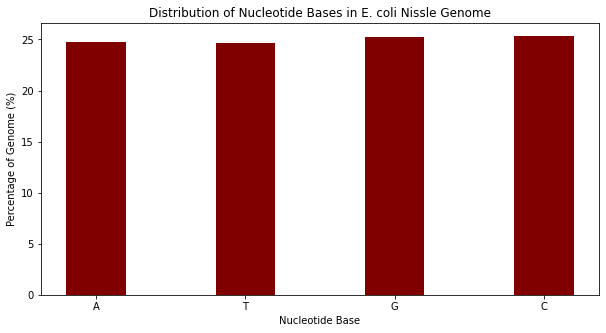

In [19]:
# creating the dataset
data = {'A':frac_A, 'T':frac_T, 'G':frac_G,'C':frac_C}
bases = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(bases, values, color ='maroon', width = 0.4)

plt.xlabel("Nucleotide Base")
plt.ylabel("Percentage of Genome (%)")
plt.title("Distribution of Nucleotide Bases in E. coli Nissle Genome")
plt.savefig('Distribution of Nucleotide Bases.png')
plt.show()


## Dendrogram Code

In [20]:
# Function-based Dendrogram Generator

def create_square_mat(genes_df, genes_df_paired):
    
    square_mat_df = pd.DataFrame(np.zeros((len(genes_df.Gene),len(genes_df.Gene))),
                                 index = list(genes_df.Gene),
                                 columns = list(genes_df.Gene))

    np.fill_diagonal(square_mat_df.values, 1)

    gene1 = list(np.zeros((len(genes_df_paired.Genes),1)))
    gene2 = list(np.zeros((len(genes_df_paired.Genes),1)))

    for i in range(len(genes_df_paired.Genes)):
        for j in range(len(genes_df.Gene)):
            gene1[i]=genes_df_paired.Genes[i][0:4]
            gene2[i]=genes_df_paired.Genes[i][7:11]
        square_mat_df.loc[gene1[i],gene2[i]] = genes_df_paired.Similarity[i]
        square_mat_df.loc[gene2[i],gene1[i]] = genes_df_paired.Similarity[i]
    
    return square_mat_df

def create_dendogram(square_mat_df, genes_df):
    
    square_mat_df -= 1
    mat = -square_mat_df
    dists = squareform(mat)
    linkage_matrix = linkage(dists, "single")
    figure(figsize=(10,5))
    dend = dendrogram(linkage_matrix, labels=list(genes_df.Gene))
    plt.title("Dendrogram of Genes")
    plt.ylabel("Dissimilarity of Genes")
    plt.xlabel("Genes")
    plt.ylim([0,1])
    plt.show()
    
    return dend

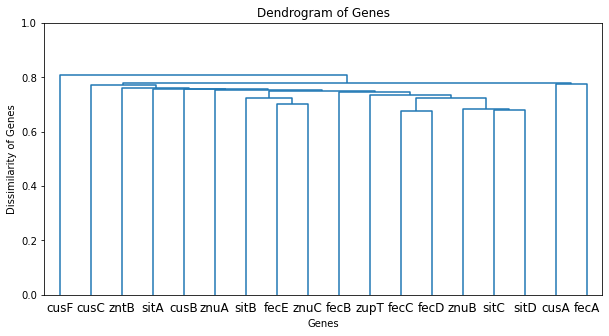

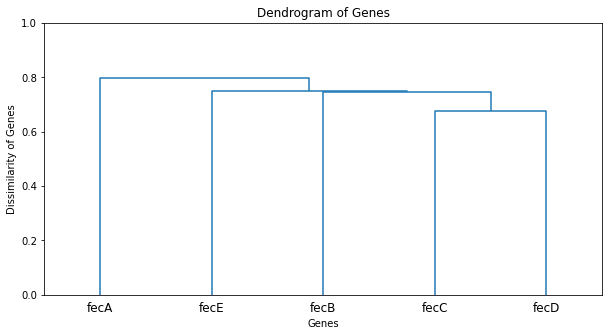

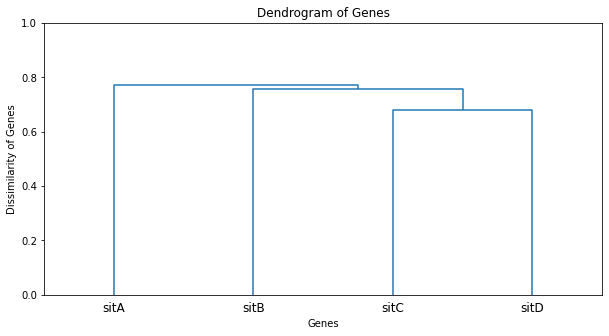

In [21]:
# All Dendrograms

square_mat_all_df = create_square_mat(genes_df_all, genes_df_all_paired)
dend_all = create_dendogram(square_mat_all_df, genes_df_all)

square_mat_cus_df = create_square_mat(genes_df_cus, genes_df_cus_paired)
dend_cus = create_dendogram(square_mat_cus_df, genes_df_cus)

square_mat_fec_df = create_square_mat(genes_df_fec, genes_df_fec_paired)
dend_fec = create_dendogram(square_mat_fec_df, genes_df_fec)

square_mat_zn_df = create_square_mat(genes_df_zn, genes_df_zn_paired)
dend_zn = create_dendogram(square_mat_zn_df, genes_df_zn)

square_mat_sit_df = create_square_mat(genes_df_sit, genes_df_sit_paired)
dend_sit = create_dendogram(square_mat_sit_df, genes_df_sit)